<a href="https://colab.research.google.com/github/saeidsaadatigero/AI_ML_Computer-Vision/blob/main/28_Dropout_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔵 Accuracy بدون Dropout: 100.00%
🟢 Accuracy با Dropout: 100.00%


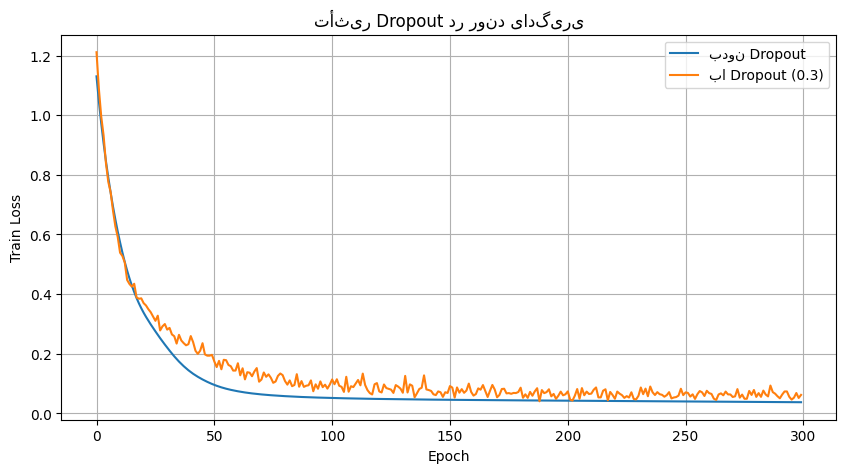

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# داده‌ها
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# مدل بدون Dropout
class Model_NoDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(4, 32),
            nn.ReLU(),
            nn.Linear(32, 3)
        )
    def forward(self, x):
        return self.net(x)

# مدل با Dropout
class Model_WithDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(4, 32),
            nn.ReLU(),
            nn.Dropout(0.3),  # خاموش کردن ۳۰٪ نورون‌ها در هر گام
            nn.Linear(32, 3)
        )
    def forward(self, x):
        return self.net(x)

# تابع آموزش
def train(model, epochs=300):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    train_loss_hist = []
    for epoch in range(epochs):
        model.train()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss_hist.append(loss.item())
    return train_loss_hist

# آموزش هر دو مدل
model1 = Model_NoDropout()
model2 = Model_WithDropout()

loss_no = train(model1)
loss_do = train(model2)

# ارزیابی روی داده تست
def accuracy(model):
    model.eval()
    with torch.no_grad():
        preds = model(X_test)
        preds = torch.argmax(preds, dim=1)
        acc = (preds == y_test).float().mean()
    return acc.item()

acc_no = accuracy(model1)
acc_do = accuracy(model2)

print(f"🔵 Accuracy بدون Dropout: {acc_no*100:.2f}%")
print(f"🟢 Accuracy با Dropout: {acc_do*100:.2f}%")

# رسم نمودار
plt.figure(figsize=(10,5))
plt.plot(loss_no, label='بدون Dropout')
plt.plot(loss_do, label='با Dropout (0.3)')
plt.title('تأثیر Dropout در روند یادگیری')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend()
plt.grid(True)
plt.show()